In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
%matplotlib inline


In [ ]:
def derivative(f,a,method='central',h=0.01):
   
    if method == 'central':
        return (f(a + h) - f(a - h))/(2*h)
    elif method == 'forward':
        return (f(a + h) - f(a))/h
    elif method == 'backward':
        return (f(a) - f(a - h))/h
    else:
        raise ValueError("Method must be 'central', 'forward' or 'backward'.")

Part 1

In [5]:
def accuracy(labels,preds):
  real_cls=np.argmax(labels,axis=1)
  pred_cls=np.argmax(preds, axis=1)  
  valid_pred=[pred_cls==real_cls]
  acc=100*np.sum(valid_pred)/len(real_cls)
  return acc

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train: ', x_train.shape)
K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST
# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
print('Reshaped x_train: ', x_train.shape)


x_train:  (50000, 32, 32, 3)
Reshaped x_train:  (50000, 3072)


In [ ]:
std=1e-5
w1 = std*np.random.randn(Din, K)
b1 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
batch_size = Ntr
iterations = 300
lr = 1.4e-2
lr_decay= 0.999
print(lr)
print(lr_decay)
reg =5e-6
loss_history = []
lr_history=[]
train_acc_history = []
val_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)
for t in range(iterations):
  # Forward pass
  y_pred=np.dot(x_train,w1)+b1
  loss=np.sum((y_pred-y_train)**2)/Ntr + reg*np.sum(w1**2)
  #print(loss)
  loss_history.append(loss)

  # Backward pass
  dw1 = 2*(1/Ntr)*(x_train.T.dot(y_pred - y_train))  + 2*reg*w1 
  w1 = w1 - lr*dw1
  I=np.ones((Ntr,1))
  db1=2*(1/Ntr)*(I.T.dot(y_pred - y_train))
  b1=b1-lr*db1

  #Accuracies
  train_acc = accuracy(y_train,y_pred)
  #train_acc=1.0-(1/Ntr)*(np.absolute(np.argmax(y_train,axis=1)-np.argmax(y_pred,axis=1))).sum()
  train_acc_history.append(train_acc)
  test_acc = accuracy( y_test, np.dot(x_test,w1)+b1)
  #valid_acc=1.0-(1/Nte)*(np.absolute(np.argmax(y_test,axis=1)-np.argmax(np.dot(x_test,w1)+b1,axis=1))).sum()
  val_acc_history.append(test_acc)

  if (t%30==0) or (t==1) or t==iterations-1:
    print("Epoch {:03} - Loss {:.4f} - Training Accuracy: {:.3f} - Testing Accuracy: {:.2f} - Learning Rate: {:.5f}"
              .format(t,loss,train_acc,test_acc,lr))
  lr_history.append(lr)
  lr=lr*lr_decay
print("Done")
#indices = np.arange(Ntr)
#rng.shuffle(indices)


# Printing accuracies and displaying w as images

w1: (3072, 10)
b1: (10,)
0.014
0.999
Epoch 000 - Loss 1.0000 - Training Accuracy: 10.448 - Testing Accuracy: 24.85 - Learning Rate: 0.01400
Epoch 001 - Loss 0.9579 - Training Accuracy: 24.404 - Testing Accuracy: 30.25 - Learning Rate: 0.01399
Epoch 030 - Loss 0.8236 - Training Accuracy: 38.206 - Testing Accuracy: 38.30 - Learning Rate: 0.01359
Epoch 060 - Loss 0.8009 - Training Accuracy: 39.608 - Testing Accuracy: 39.21 - Learning Rate: 0.01318
Epoch 090 - Loss 0.7939 - Training Accuracy: 40.282 - Testing Accuracy: 39.63 - Learning Rate: 0.01279
Epoch 120 - Loss 0.7906 - Training Accuracy: 40.772 - Testing Accuracy: 39.60 - Learning Rate: 0.01242
Epoch 150 - Loss 0.7884 - Training Accuracy: 41.150 - Testing Accuracy: 39.88 - Learning Rate: 0.01205
Epoch 180 - Loss 0.7868 - Training Accuracy: 41.362 - Testing Accuracy: 40.12 - Learning Rate: 0.01169
Epoch 210 - Loss 0.7856 - Training Accuracy: 41.490 - Testing Accuracy: 40.26 - Learning Rate: 0.01135
Epoch 240 - Loss 0.7845 - Training A

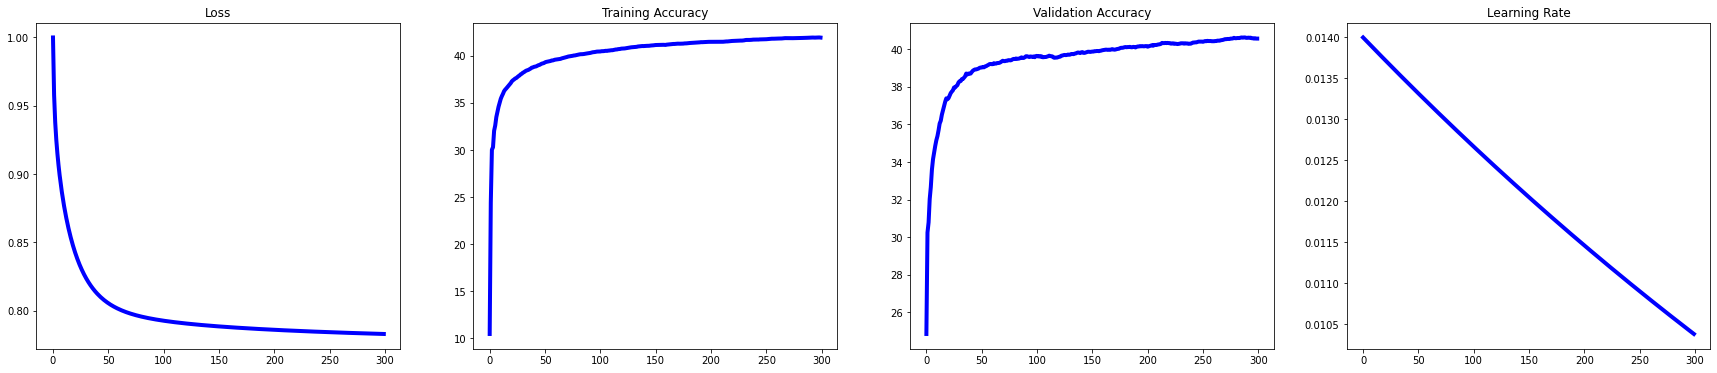

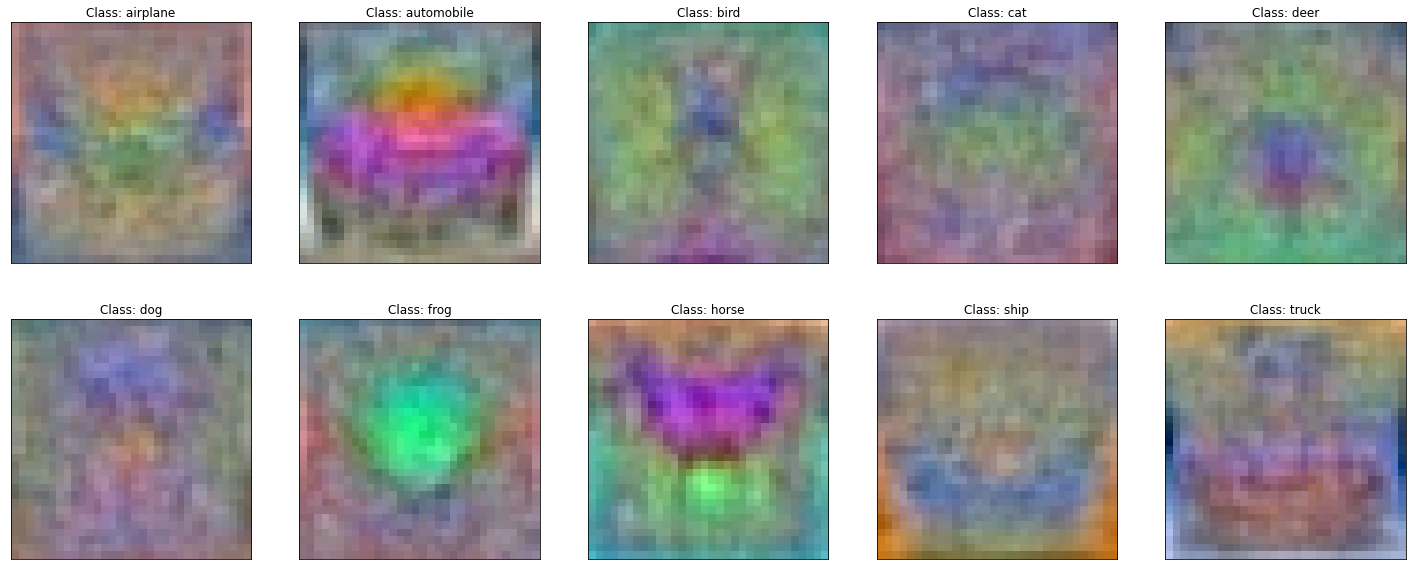

In [ ]:
fig, axes  = plt.subplots(1,4, sharex='all', sharey='all', figsize=(30,6))
items = {"Loss":loss_history, "Training Accuracy":train_acc_history,\
         "Validation Accuracy": val_acc_history, "Learning Rate":lr_history}
location = 1
for key in items.keys():
    plt.subplot(1,4,location);plt.plot(items[key], color='#0000ff', linewidth=4)
    plt.title(key)
    location+=1


# -------------------Showing the weights matrix W1 as 10 images-----------------
weights = w1 # Removing the row of bias terms.
weights_pos =  weights- np.min(weights)# Making the minimum weight zero.
images = ((weights_pos/np.max(weights_pos))*255).astype('uint8')
CIFAR10 = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
fig, axes  = plt.subplots(2,5, sharex='all', sharey='all', figsize=(25,10))
location = 1 # Location of the image in the grid of 2x5
for i in range(K):
    image = images[:,i].reshape(32,32,3)
    plt.subplot(2,5,location),plt.imshow(image[:,:,::-1])
    plt.title("Class: {}".format(CIFAR10[i])),plt.xticks([]),plt.yticks([])    
    location+=1

Part 2

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train:_', x_train.shape)

Ntr = x_train.shape[0]

Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST
# Normalize pixel values
x_train = x_train[range(Ntr),:]
x_test = x_test[range(Nte),:]
y_train = y_train[range(Ntr)]
y_test = y_test[range(Nte)]
K = len(np.unique(y_train)) 
 
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)
 
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

H=200

std=1e-6
w1 = std*np.random.randn(Din, H)
w2 = std*np.random.randn(H, K)
b1=np.zeros(H)
b2=np.zeros(K)
print("w1:",w1.shape)
print("b1:",b1.shape)
print("w2:",w2.shape)
print("b2:",b2.shape)
batch_size = Ntr

iterations = 300    
lr=1.4e-2 #0.005
lr_decay = 0.999
reg = 5e-6
loss_history = []
learning_rate=[]
train_acc_history = []
val_acc_history = []
for t in range(iterations):
    batch_indices= np.random.choice(Ntr,batch_size)
    x=x_train[batch_indices]
    y=y_train[batch_indices]
    h=1.0/(1.0+np.exp(-(x.dot(w1)+b1)))
    y_pred = h.dot(w2)+b2
    loss = (1./batch_size)*np.square(y_pred-y).sum() + reg*(np.sum(w2*w2)+np.sum(w1*w1))
    loss_history.append(loss)
    if t%30 == 0:
        print("iterarion %d/%d: loss %f" %(t,iterations,loss))
    dy_pred = (1.0/batch_size)*2.0*(y_pred-y)
    dw2=h.T.dot(dy_pred)+reg*w2
    db2=dy_pred.sum(axis=0)
    dh=dy_pred.dot(w2.T)
    dw1=x.T.dot(dh*h*(1-h)) + reg*w1
    db1=(dh*h*(1-h)).sum(axis=0)
    w1 -= lr*dw1
    w2 -= lr*dw2
    b1 -=lr*db1
    b2 -= lr*db2
    lr = lr*lr_decay

x_train:_ (50000, 32, 32, 3)
w1: (3072, 200)
b1: (200,)
w2: (200, 10)
b2: (10,)
iterarion 0/300: loss 0.999999
iterarion 30/300: loss 0.838125
iterarion 60/300: loss 0.807403
iterarion 90/300: loss 0.791763
iterarion 120/300: loss 0.773181
iterarion 150/300: loss 0.770449
iterarion 180/300: loss 0.762499
iterarion 210/300: loss 0.749924
iterarion 240/300: loss 0.753299
iterarion 270/300: loss 0.747377


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


xt (50000, 3072)
train_acc 46.026
xt (10000, 3072)
test_acc 43.04


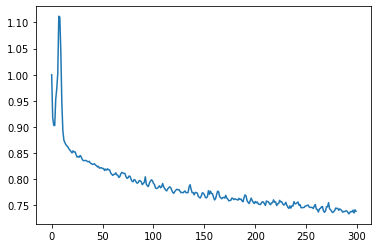

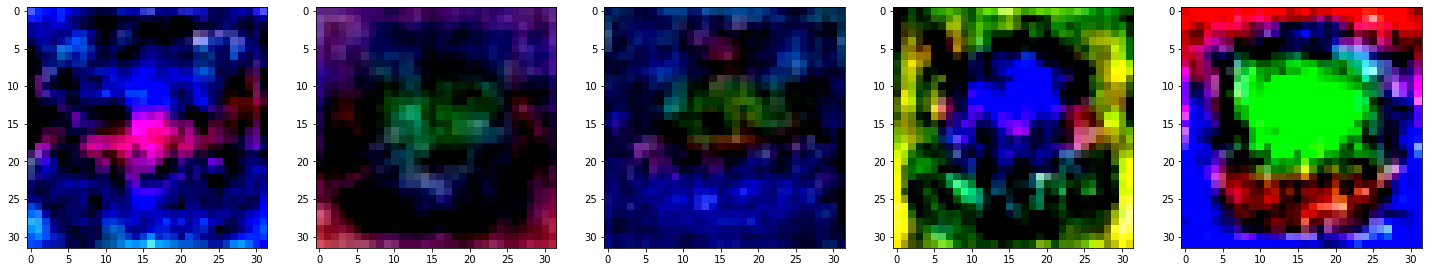

In [6]:
plt.plot(loss_history)
fig,ax=plt.subplots(1,5,figsize=(25,10))

for i in range(5):
    img=w1[:,i].reshape(32,32,3)
    ax[i].imshow(img*1000)
plt.show


xt=x_train
print('xt',xt.shape)
h=1/(1+np.exp(-(xt.dot(w1)+b1)))
y_pred=h.dot(w2)+b2

#train_acc= 1-1/Ntr *(np.abs(np.argmax(y_train,axis=1)-np.argmax(y_pred,axis=1))).sum()/(K-1)
train_acc = accuracy(y_train,y_pred)
print('train_acc',train_acc)

xt=x_test
print('xt',xt.shape)
h=1/(1+np.exp(-(xt.dot(w1)+b1)))
y_pred=h.dot(w2)+b2

#test_acc= 1-1/Nte *(np.abs(np.argmax(y_test,axis=1)-np.argmax(y_pred,axis=1))).sum()/(K-1)
test_acc = accuracy(y_test, y_pred)
print('test_acc',test_acc)


Part 3

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train:_', x_train.shape)

Ntr = x_train.shape[0]

Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST
# Normalize pixel values
x_train = x_train[range(Ntr),:]
x_test = x_test[range(Nte),:]
y_train = y_train[range(Ntr)]
y_test = y_test[range(Nte)]
K = len(np.unique(y_train)) 
 
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)
 
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

H=200

std=1e-6
w1 = std*np.random.randn(Din, H)
w2 = std*np.random.randn(H, K)
b1=np.zeros(H)
b2=np.zeros(K)
print("w1:",w1.shape)
print("b1:",b1.shape)
print("w2:",w2.shape)
print("b2:",b2.shape)
batch_size = 500 #Ntr

iterations = 300    
lr=1.4e-2 #0.005
lr_decay = 0.999
reg = 5e-6
loss_history = []
learning_rate=[]
train_acc_history = []
val_acc_history = []
for t in range(iterations):
    batch_indices= np.random.choice(Ntr,batch_size)
    x=x_train[batch_indices]
    y=y_train[batch_indices]
    h=1.0/(1.0+np.exp(-(x.dot(w1)+b1)))
    y_pred = h.dot(w2)+b2
    loss = (1./batch_size)*np.square(y_pred-y).sum() + reg*(np.sum(w2*w2)+np.sum(w1*w1))
    loss_history.append(loss)
    if t%30 == 0:
        print("iterarion %d/%d: loss %f" %(t,iterations,loss))
    dy_pred = (1.0/batch_size)*2.0*(y_pred-y)
    dw2=h.T.dot(dy_pred)+reg*w2
    db2=dy_pred.sum(axis=0)
    dh=dy_pred.dot(w2.T)
    dw1=x.T.dot(dh*h*(1-h)) + reg*w1
    db1=(dh*h*(1-h)).sum(axis=0)
    w1 -= lr*dw1
    w2 -= lr*dw2
    b1 -=lr*db1
    b2 -= lr*db2
    lr = lr*lr_decay

x_train:_ (50000, 32, 32, 3)
w1: (3072, 200)
b1: (200,)
w2: (200, 10)
b2: (10,)
iterarion 0/300: loss 1.000002
iterarion 30/300: loss 0.854675
iterarion 60/300: loss 0.843199
iterarion 90/300: loss 0.812771
iterarion 120/300: loss 0.807402
iterarion 150/300: loss 0.794647
iterarion 180/300: loss 0.793525
iterarion 210/300: loss 0.782650
iterarion 240/300: loss 0.772787
iterarion 270/300: loss 0.770405


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


xt (50000, 3072)
train_acc 40.87
xt (10000, 3072)
test_acc 39.57


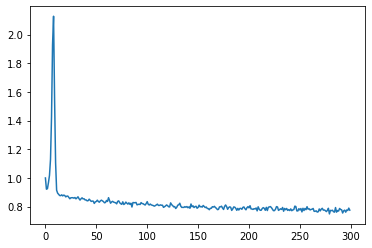

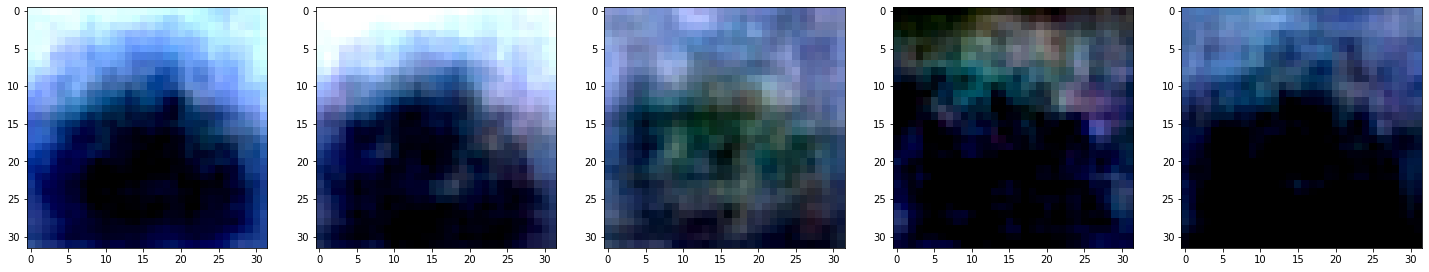

In [ ]:
plt.plot(loss_history)
fig,ax=plt.subplots(1,5,figsize=(25,10))

for i in range(5):
    img=w1[:,i].reshape(32,32,3)
    ax[i].imshow(img*1000)
plt.show


xt=x_train
print('xt',xt.shape)
h=1/(1+np.exp(-(xt.dot(w1)+b1)))
y_pred=h.dot(w2)+b2

#train_acc= 1-1/Ntr *(np.abs(np.argmax(y_train,axis=1)-np.argmax(y_pred,axis=1))).sum()/(K-1)
train_acc = accuracy(y_train,y_pred)
print('train_acc',train_acc)

xt=x_test
print('xt',xt.shape)
h=1/(1+np.exp(-(xt.dot(w1)+b1)))
y_pred=h.dot(w2)+b2

#test_acc= 1-1/Nte *(np.abs(np.argmax(y_test,axis=1)-np.argmax(y_pred,axis=1))).sum()/(K-1)
test_acc = accuracy(y_test, y_pred)
print('test_acc',test_acc)

Part 4